Now let us introduce the part of the spread which is non-negligibly coupled to the future motion.
The retarded light cone density matrix
$$
\widehat{\rho}_{+}\left(t\right)=\intop_{0}^{t}d\tau\left|\alpha\left(\tau\right)\right\rangle \left\langle \alpha\left(\tau\right)\right|
$$

gives the estimate how the 1-particle wavefunction is coupled to the motion during time interval $[0, t]$ 

In [14]:
import numpy as np
import lightcones
n_sites = 1100
e = 1
h = 0.05
es = [e]*n_sites
hs = [h]*(n_sites-1)
dt = 0.01
t = 10000
tg = np.arange(0, t + dt, dt)
ntg = tg.size
alpha = lightcones.spread(es, hs, ntg, dt)
rho_plus = lightcones.rho_plus(alpha, dt)

Since the chain Hamiltonian is real, the complex conjugate spread corresponds to negative times:
$$
\left|\alpha\left(\tau\right)^{*}\right\rangle = \left|\alpha\left(-\tau\right)\right\rangle.
$$
This can be interpreted as the state of the quantum which was emttited $\tau$ time units ago.


Then the product 

$$
    \left|\textrm{memory}\left(\tau\right)\right\rangle \equiv \widehat{\rho}_{+}\left(t\right)  \left|\alpha\left(\tau\right)^{*}\right\rangle
$$

means the filtering operation: only those components of $\left|\alpha\left(\tau\right)^{*}\right\rangle$ survive which are still significantly coupled after $\tau$ units of time. That is, it is the part of the quantum state which contributes to the "memory" (non-Markovianity)

Let us compute this filtering:

In [17]:
import math
import numpy as np

def wigner(psi, k):
    
    ns = len(psi)
    nk = len(k)
    
    f = psi
    rho_w = np.zeros((ns, 2*ns), dtype = complex)
    
    for i in range(ns):
        for j in range(2*ns):
            if j < i:
                rho_w[i, j] = 0
                continue
                
            if j - i >= ns:
                rho_w[i, j] = 0
                continue
                
            rho_w[i, j] = f[i] * f[j - i].conj()

    w_ = np.zeros((nk, 2*ns), dtype = complex)

    for i in range(ns):
        for j in range(2*ns):
            for p in range(nk):
                w_[p, j] = w_[p, j] + rho_w[i, j] * np.exp(-1j * 2 * i * k[p])
            
    for i in range(2*ns):
        for p in range(nk):
            w_[p, i] = w_[p, i] * np.exp(1j * i * k[p])
            
    return w_

In [18]:
import matplotlib.pyplot as plt

Initial time moment $\tau = 0$:

In [29]:
n_sites_cut = 400
ti = 0
memory = rho_plus @ alpha[:, ti].conj()
memory = memory[:n_sites_cut]

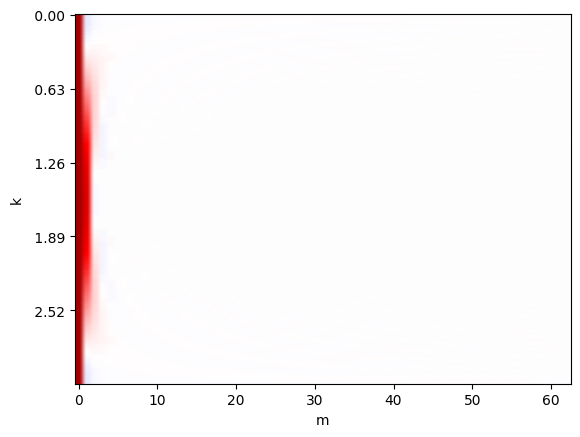

<Figure size 640x480 with 0 Axes>

In [30]:
k = np.arange(0, math.pi, 0.01)

w_p = wigner(memory, k)

max_ = np.max(np.abs(w_p[:]))

im = plt.imshow(w_p[:, :125:2].real, aspect='auto', cmap = 'seismic', vmin = -max_, vmax = max_)
plt.xlabel('m')
plt.ylabel('k')
plt.yticks([len(k)/5 * i for i in range(5)], labels = ["{:5.2f}".format(k[round(len(k)/5 * i)]) for i in range(5)])
plt.show()
plt.savefig('pictures/memory_t0.eps', format = 'eps')

After $\tau=200$ units of time:

In [32]:
n_sites_cut = 400
ti = 20000
memory = rho_plus @ alpha[:, ti].conj()
memory = memory[:n_sites_cut]

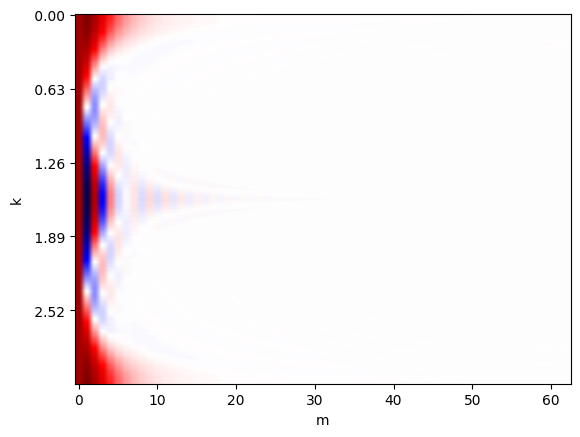

<Figure size 640x480 with 0 Axes>

In [33]:
k = np.arange(0, math.pi, 0.01)

w_p = wigner(memory, k)

max_ = np.max(np.abs(w_p[:]))

im = plt.imshow(w_p[:, :125:2].real, aspect='auto', cmap = 'seismic', vmin = -max_, vmax = max_)
plt.xlabel('m')
plt.ylabel('k')
plt.yticks([len(k)/5 * i for i in range(5)], labels = ["{:5.2f}".format(k[round(len(k)/5 * i)]) for i in range(5)])
plt.show()
plt.savefig('pictures/memory_t200.eps', format = 'eps')

After $\tau=500$ units of time:

In [28]:
n_sites_cut = 400
ti = 50000
memory = rho_plus @ alpha[:, ti].conj()
memory = memory[:n_sites_cut]

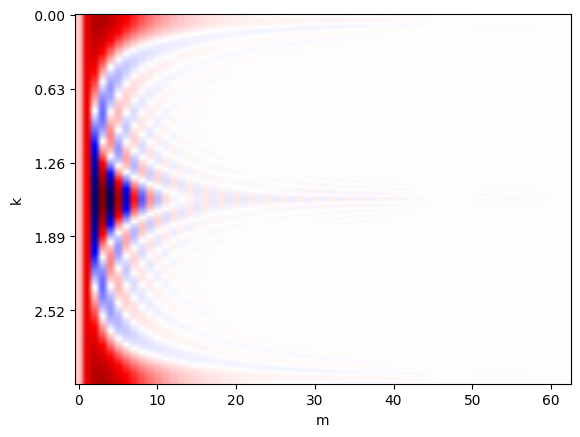

<Figure size 640x480 with 0 Axes>

In [26]:
k = np.arange(0, math.pi, 0.01)

w_p = wigner(memory, k)

max_ = np.max(np.abs(w_p[:]))

im = plt.imshow(w_p[:, :125:2].real, aspect='auto', cmap = 'seismic', vmin = -max_, vmax = max_)
plt.xlabel('m')
plt.ylabel('k')
plt.yticks([len(k)/5 * i for i in range(5)], labels = ["{:5.2f}".format(k[round(len(k)/5 * i)]) for i in range(5)])
plt.show()
plt.savefig('pictures/memory_t500.eps', format = 'eps')

After  𝜏=500 units of time:

We see that indeed the memory resides in the band edges.